In [1]:
# 1 - Import the necessary libraries.

import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy import stats

In [2]:
# 2 - Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
# 3 - First look at its main features (head, shape, info).

customer_df.shape

(9134, 24)

In [4]:
customer_df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [5]:
# 4 -Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [6]:
new_column_names = {}
for col in customer_df.columns:
    new_col = col.lower().replace(' ', '_')
    new_column_names[col] = new_col

customer_df = customer_df.rename(columns=new_column_names)

In [7]:
customer_df.head(5)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [8]:
# 5 - Change effective to date column to datetime format.

In [9]:
customer_df['effective_to_date']= pd.to_datetime(customer_df['effective_to_date'])

In [10]:
customer_df.head(5)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [11]:
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [12]:
# 6 - Create a new dataframe using only the numerical data called numerical_df. Use this for the following questions.

In [13]:
numerical_df = customer_df.select_dtypes (include = np.number)

In [14]:
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [15]:
# 7 - Define a function that differentiates between continuous and discrete variables. 
#Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do 
#the same for discrete_df

In [16]:
def differentiate_variables(DataFrame):
    continuous_cols = []
    discrete_cols = []
    
    for col in numerical_df.columns:
        if numerical_df[col].nunique() <=20:
            discrete_cols.append(col)
        else:
            continuous_cols.append(col)
    continuous_df = DataFrame[continuous_cols]
    discrete_df = DataFrame[discrete_cols]
    
    return continuous_df, discrete_df   

In [17]:
continuous_df, discrete_df = differentiate_variables(numerical_df)

In [18]:
#8 - Plot a correlation matrix, comment what you see.

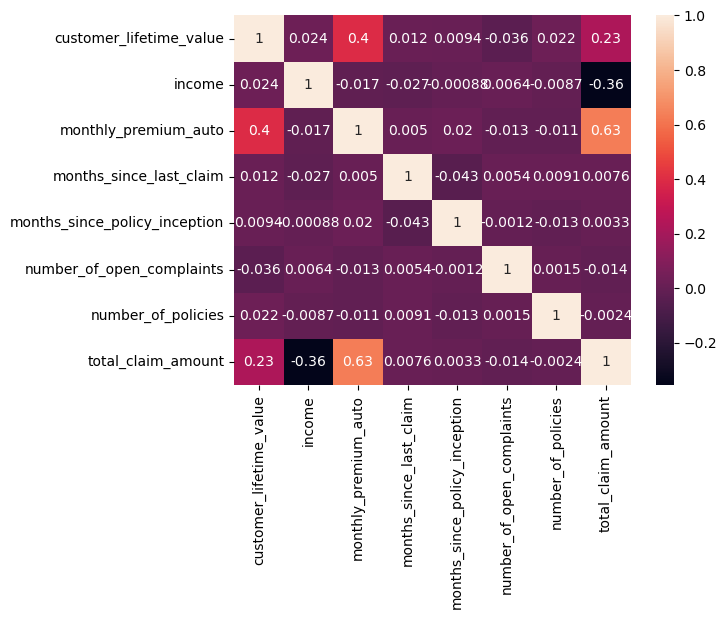

In [19]:
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True)   
plt.show()

#The highest correlation between columns is monthly premium auto with total_claim amount.
#There's also a high correlation between costumer lifetime value and total claim amount, 
#and a negative correlation between income and total claim amount
#There is no obvious multicolinearity standing out.

In [20]:
#9. Create a function to plot every discrete variable. Do the same with the continuous 
#variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

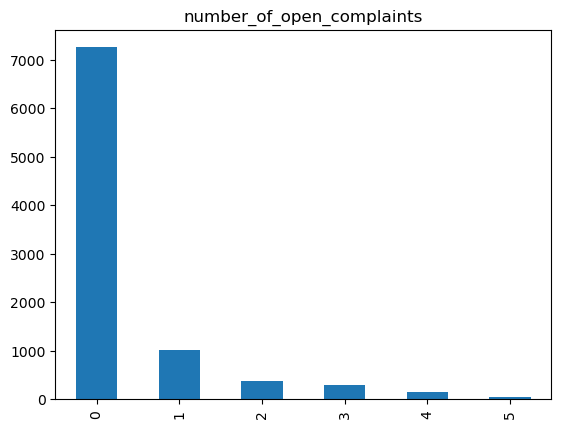

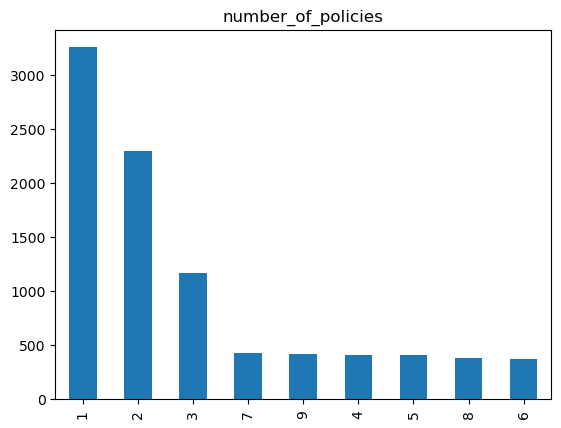

In [21]:
def plot_discrete_variables():
    for c in discrete_df:
        plt.figure()
        discrete_df[c].value_counts().plot(kind='bar')
        plt.title(c)
        plt.show()
plot_discrete_variables()

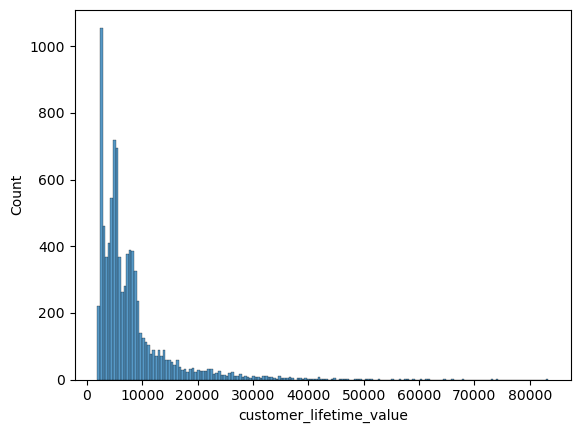

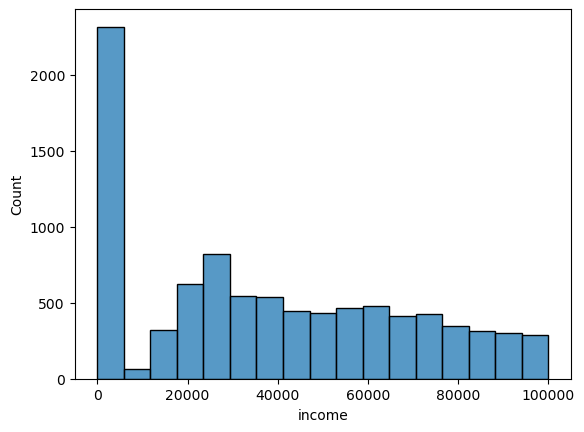

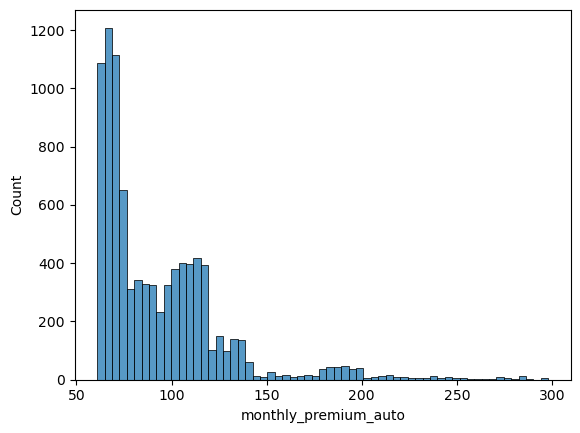

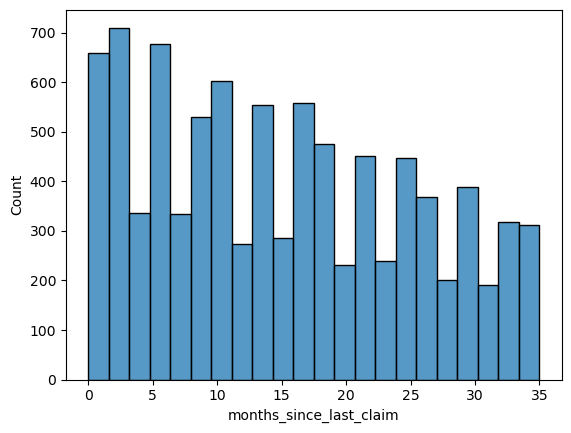

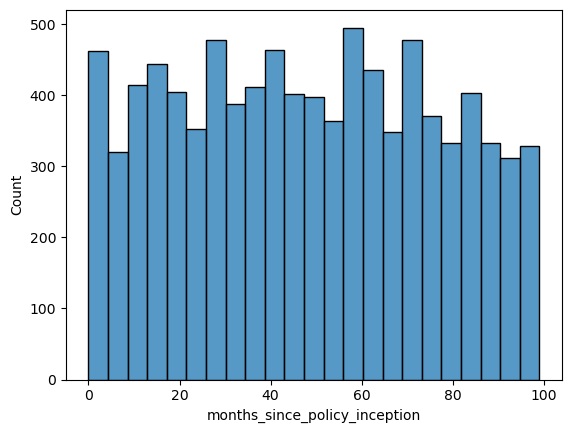

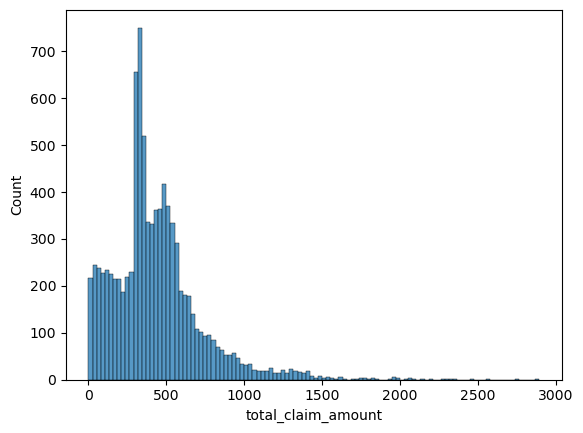

In [22]:
def plot_continuous_variables(df):
    for c in df.columns:
        sns.histplot(x=c, data=df)
        plt.show()
plot_continuous_variables(continuous_df)

In [23]:
# 10. Comment what you can see in the plots.

# In ours plots from discrete variables it seems pretty normal, nothing to comment.

#In our plots from continuous variables, the plot for customer lifetime value and monthly_premium_auto we can see a skew 
#to the left. 
#For the income and total_claim_amount we see a lot of outliers.


In [24]:
#11.Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

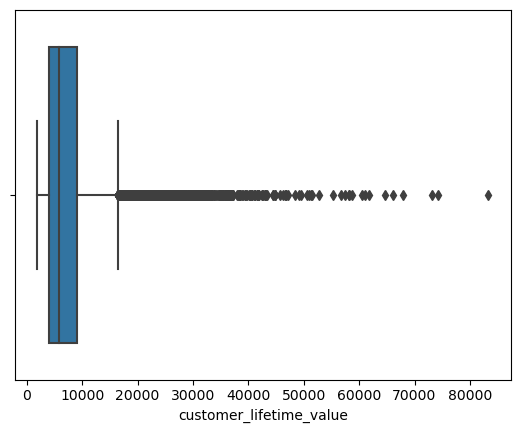

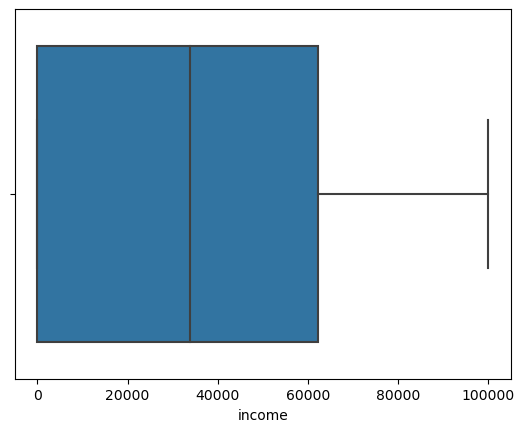

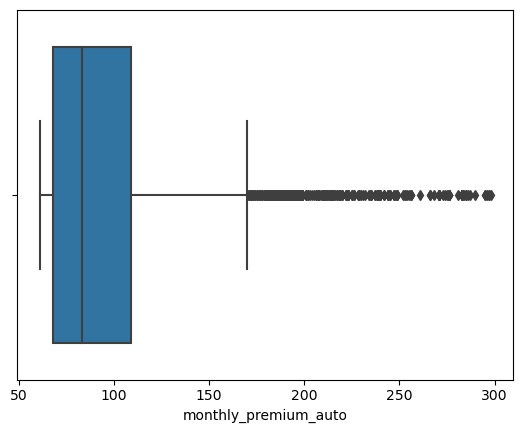

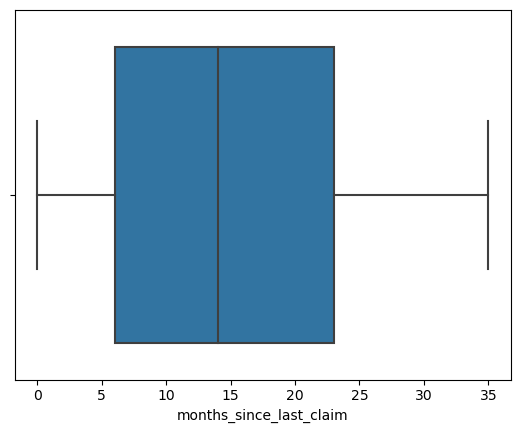

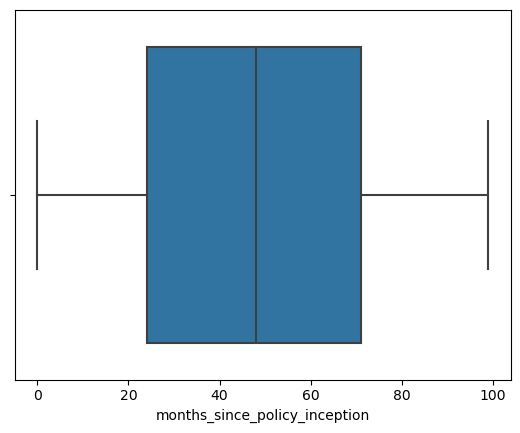

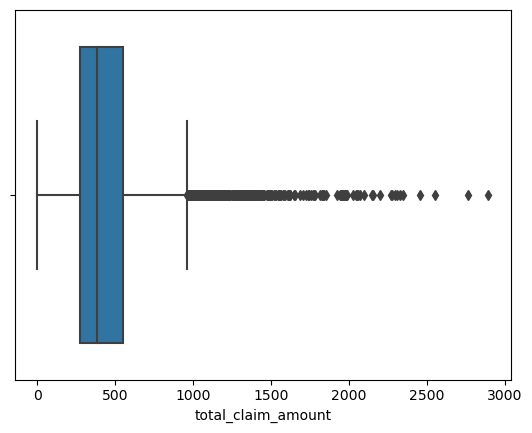

In [25]:
def plot_continuous_variables(df):
    for col in df.columns:
        if df[col].dtype != "object" and df[col].nunique() > 20:
            plt.figure()
            sns.boxplot(x=col, data=df)
            plt.show()
plot_continuous_variables(continuous_df)

In [26]:
#12. Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now.

#Taking into account the graphs from the previous question (boxplot) we find some outliers, specially in 3 graphics: 
#'customer_lifetime_value', 'monthly_premium_auto' and 'total_claim_amount'.

# For customer_lifetime_value we can see outliers above the 50000 mark. we would bring the outliers down 
#with the log transformation.

#For monthly_premium_auto we can see outliers above the 150 mark.I would not drop this outliers, because the data could be important

#For total_claim_amount we can see outliers above the 2500 mark.I would not drop this outliers

In [64]:
#Apply the log transformation in the column "customer_lifetime_value"

continuous_df['customer_lifetime_value'] = np.log(continuous_df['customer_lifetime_value'])

C:\Users\ines_\AppData\Local\Temp\ipykernel_16108\863512700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continuous_df['customer_lifetime_value'] = np.log(continuous_df['customer_lifetime_value'])


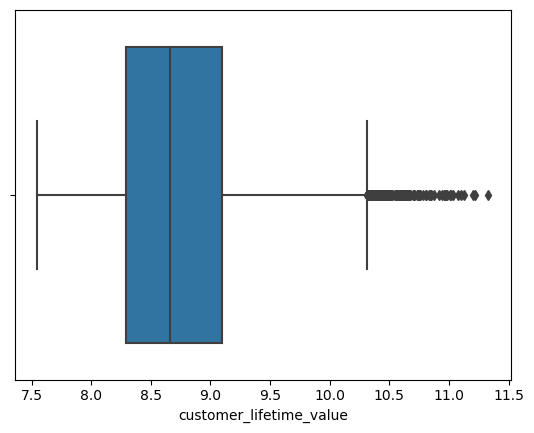

In [66]:
plt.figure()
sns.boxplot(x='customer_lifetime_value', data=continuous_df)
plt.show()

In [ ]:
#13. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

In [39]:
(customer_df.isna().sum()/len(customer_df)).sort_values(ascending=False)

customer                         0.0
state                            0.0
vehicle_class                    0.0
total_claim_amount               0.0
sales_channel                    0.0
renew_offer_type                 0.0
policy                           0.0
policy_type                      0.0
number_of_policies               0.0
number_of_open_complaints        0.0
months_since_policy_inception    0.0
months_since_last_claim          0.0
monthly_premium_auto             0.0
marital_status                   0.0
location_code                    0.0
income                           0.0
gender                           0.0
employmentstatus                 0.0
effective_to_date                0.0
education                        0.0
coverage                         0.0
response                         0.0
customer_lifetime_value          0.0
vehicle_size                     0.0
dtype: float64

In [ ]:
#14. Save the numerical_df to csv as numerical.csv You will use this file again this week.

In [68]:
numerical_df.to_csv("numerical.csv")